In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir("/content/drive/My Drive/Demonstrations")

['Demonstration_of_Optimizers_in_Keras',
 'Padding_convolution_MaxPool from Scratch']

In [0]:
os.chdir("/content/drive/My Drive/Demonstrations/Padding_convolution_MaxPool from Scratch")

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (50.0, 50.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(1)

### Padding

In [0]:
 a = np.array([[1, 2, 3], [4, 5,6],[7,8,9]])

In [0]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
a.shape

(3, 3)

In [0]:
np.pad(array = a, pad_width=(2, 2),mode= 'constant',constant_values=(0, 0))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 7, 8, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [0]:
a = np.random.randn(1, 3, 3, 3)
a

array([[[[ 1.62434536, -0.61175641, -0.52817175],
         [-1.07296862,  0.86540763, -2.3015387 ],
         [ 1.74481176, -0.7612069 ,  0.3190391 ]],

        [[-0.24937038,  1.46210794, -2.06014071],
         [-0.3224172 , -0.38405435,  1.13376944],
         [-1.09989127, -0.17242821, -0.87785842]],

        [[ 0.04221375,  0.58281521, -1.10061918],
         [ 1.14472371,  0.90159072,  0.50249434],
         [ 0.90085595, -0.68372786, -0.12289023]]]])

In [0]:
a.shape

(1, 3, 3, 3)

In [0]:
a = np.pad(a, ((0,0), (2,2), (2,2),(0,0)), 'constant', constant_values =0)

In [0]:
a

array([[[[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 1.62434536, -0.61175641, -0.52817175],
         [-1.07296862,  0.86540763, -2.3015387 ],
         [ 1.74481176, -0.7612069 ,  0.3190391 ],
         [ 0.        ,  0.        ,  0.       

In [0]:
print(a.shape)

(1, 7, 7, 3)


In [0]:
!ls

'Demonstration of Padding,Maxpool,Convolution.ipynb'   IMG_20191114_191626.jpg
 img


In [0]:
sample_img ="image_name.jpg"

In [0]:
?cv2.resize

In [0]:
from google.colab.patches import cv2_imshow
image = cv2.imread(sample_img)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image,(200,200))


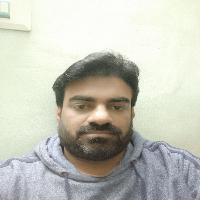

(200, 200, 3)

In [0]:
cv2_imshow(image)
pixels = np.array(image)
pixels.shape

In [0]:
#print(pixels)


In [0]:
image_array = np.pad(array = pixels, pad_width=((2,2),(2,2),(0,0)),mode= 'constant',constant_values=(0,0))

In [0]:
print(image_array.shape)

(204, 204, 3)


In [0]:
from PIL import Image

In [0]:
img = Image.fromarray(image_array)

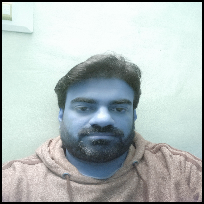

In [0]:
img

In [0]:
def zero_pad(X, pad):
  """
   Take a array of images and pad the second and thrid dimensions which are nothing but the width and height of the images
   with zero pad so that the output will be the array of images padded with changed shape as (no. of images,width+2,height+2,channels)
  """
    
  X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
      
  return X_pad

In [0]:
pixels = pixels.reshape((1,pixels.shape[0],pixels.shape[1],pixels.shape[2]))

In [0]:
pixels.shape

(1, 200, 200, 3)

In [0]:
imgarray = zero_pad(pixels,2)

In [0]:
imgarray = imgarray.reshape(imgarray.shape[1],imgarray.shape[2],imgarray.shape[3])

In [0]:
img = Image.fromarray(imgarray,mode="RGB")

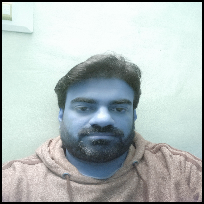

In [0]:
img

#### Convolution 


In [0]:
(m, n_H_prev, n_W_prev, n_C_prev) = pixels.shape

In [0]:
conv_filter = np.random.randn(2,2,3,5)

In [0]:
conv_filter.shape

(2, 2, 3, 5)

In [0]:
(f, f, n_C_prev, n_C) = conv_filter.shape

In [0]:
stride =2
pad = 2

In [0]:
new_Height = int((n_H_prev - f + 2 * pad) / stride) + 1
new_Width = int((n_W_prev - f + 2 * pad) / stride) + 1

In [0]:
convolved_image = np.zeros((m,new_Height,new_Width,n_C))

In [0]:
img = Image.fromarray(convolved_image.reshape((new_Height,new_Width,n_C)),mode="RGB")

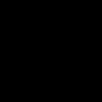

In [0]:
img

In [0]:
padded_images = zero_pad(pixels,2)

In [0]:
padded_images.shape

(1, 204, 204, 3)

In [0]:
padded_images[0].shape

(204, 204, 3)

In [0]:
conv_filter[...,0].shape

(2, 2, 3)

In [0]:
b = np.random.randn(1,1,1,5)

In [0]:
b

array([[[[-0.37528495, -0.63873041,  0.42349435,  0.07734007,
          -0.34385368]]]])

In [0]:
type(b)

numpy.ndarray

### Convolution Demo

![Convolution Demo](https://media.giphy.com/media/i4NjAwytgIRDW/giphy.gif)

In [0]:
for i in range(m):                               # loop over the batch of training examples
        padded_image = padded_images[i]    
        #print(padded_image.shape)                           # Select ith training example's padded activation
        for h in range(new_Height):                           # loop over vertical axis of the output volume
            for w in range(new_Width):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
                    
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    
                    padded_slice = padded_image[vert_start:vert_end, horiz_start:horiz_end, :]
                
                    s = np.multiply(padded_slice,conv_filter[:,:,:,c])+b[:,:,:,c]
                  
                    convolved_image[i, h, w, c]= np.sum(s)
    
                    

In [0]:
convolved_image.shape

(1, 102, 102, 5)

In [0]:
img = Image.fromarray(convolved_image.reshape((new_Height,new_Height,n_C)),mode="RGB")

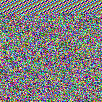

In [0]:
img

#### Pooling Layers

 The __pooling (POOL) layer__ reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are:

* __Max-pooling layer__: slides an ($f, f$) window over the input and stores the max value of the window in the output.

* __Average-pooling layer__: slides an ($f, f$) window over the input and stores the average value of the window in the output.

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$$$ n_C = n_{C_{prev}}$$

![Max Pool Layer](https://predictiveprogrammer.com/wp-content/uploads/2018/06/maxpool.gif)

In [0]:
(m, n_H_prev, n_W_prev, n_C_prev) =convolved_image.shape
  
f = 4
stride = 1
   
n_H = int(1 + (n_H_prev - f) / stride)
n_W = int(1 + (n_W_prev - f) / stride)
n_C = n_C_prev
  
A = np.zeros((m, n_H, n_W, n_C))              
  
for i in range(m):                         
  for h in range(n_H):                     
    for w in range(n_W):                 
      for c in range (n_C):  
        # loop over the channels of the output volume       
        vert_start = h * stride
        vert_end = h + f
        horiz_start = w * stride
        horiz_end = w + f                                        
        a_prev_slice = convolved_image[i, h:h+f, w:w+f, c]
        A[i, h, w, c] = np.max(a_prev_slice)
        

In [0]:
A.shape

(1, 99, 99, 5)

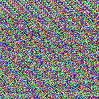

In [0]:
img = Image.fromarray(A.reshape((n_H,n_W,n_C)),mode="RGB")
img